## Problem Set 3

### Question 1
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

In [2]:
import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep="|")
occavgage = users.groupby(['occupation'])['age'].mean()
df = pd.DataFrame(occavgage)
df.round(decimals=1)

,age
occupation,
administrator,38.7
artist,31.4
doctor,43.6
educator,42.0
engineer,36.4
entertainment,29.2
executive,38.7
healthcare,41.6
homemaker,32.6


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [7]:
table = users.groupby(['occupation','gender']).count()
df = pd.DataFrame(table)
pivot = pd.pivot_table(df,'user_id','gender','occupation').apply(lambda r: r/r.sum())
df = pd.DataFrame(pivot, index=['M'])
df.sort_values(by='M',axis=1,ascending=False).round(decimals=4)

occupation,doctor,engineer,technician,retired,programmer,executive,scientist,entertainment,lawyer,salesman,...,student,other,marketing,writer,none,administrator,artist,librarian,healthcare,homemaker
M,1.0,0.9701,0.963,0.9286,0.9091,0.9062,0.9032,0.8889,0.8333,0.75,...,0.6939,0.6571,0.6154,0.5778,0.5556,0.5443,0.5357,0.4314,0.3125,0.1429


Step 6. For each occupation, calculate the minimum and maximum ages

In [194]:
table = users.groupby(['occupation'])['age'].min()
df = pd.DataFrame(table)
df

,age
occupation,
administrator,21
artist,19
doctor,28
educator,23
engineer,22
entertainment,15
executive,22
healthcare,22
homemaker,20


Step 7. For each combination of occupation and sex, calculate the mean age

In [195]:
table = users.groupby(['occupation','gender'])['age'].mean()
df = pd.DataFrame(table)
df.round(decimals=1)

age
occupation    gender      
administrator F       40.6
              M       37.2
artist        F       30.3
              M       32.3
doctor        M       43.6
educator      F       39.1
              M       43.1
engineer      F       29.5
              M       36.6
entertainment F       31.0
              M       29.0
executive     F       44.0
              M       38.2
healthcare    F       39.8
              M       45.4
homemaker     F       34.2
              M       23.0
lawyer        F       39.5
              M       36.2
librarian     F       40.0
              M       40.0
marketing     F       37.2
              M       37.9
none          F       36.5
              M       18.6
other         F       35.5
              M       34.0
programmer    F       32.2
              M       33.2
retired       F       70.0
              M       62.5
salesman      F       27.0
              M       38.6
scientist     F       28.3
              M       36.3
student       F       20.8
              M       22.7
technician    F       38.0
              M       33.0
writer        F       37.6
              M       35.3

Step 8. For each occupation present the percentage of women and men

In [54]:
table = users.groupby(['occupation','gender']).count()
df = pd.DataFrame(table)
pivot = pd.pivot_table(df,'user_id','gender','occupation').apply(lambda r: r/r.sum()*100)
df = pd.DataFrame(pivot, index=['M','F'])
df.round(decimals=2)

occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
M,54.43,53.57,100.0,72.63,97.01,88.89,90.62,31.25,14.29,83.33,...,61.54,55.56,65.71,90.91,92.86,75.0,90.32,69.39,96.3,57.78
F,45.57,46.43,NaN,27.37,2.99,11.11,9.38,68.75,85.71,16.67,...,38.46,44.44,34.29,9.09,7.14,25.0,9.68,30.61,3.7,42.22


### Question 2
Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

In [461]:
import pandas as pd
import numpy as np

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv',sep=",")
table = pd.DataFrame(euro12)['Goals']
df = pd.DataFrame(table)
df.set_index(['Goals'])


""
Goals
4
4
4
5
3
10
5
6
2


Step 5. How many team participated in the Euro2012?

In [42]:
table = pd.DataFrame(euro12)['Team']
df = pd.DataFrame(table).count()
df = pd.DataFrame(df)
df

,0
Team,16


Step 6. What is the number of columns in the dataset?

In [46]:
table = pd.DataFrame(euro12)
len(table.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [62]:
table = euro12.groupby(['Team'])[['Yellow Cards','Red Cards']].sum()
discipline = pd.DataFrame(table)
discipline

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0
Germany,4,0
Greece,9,1
Italy,16,0
Netherlands,5,0


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [68]:
table = euro12.groupby(['Team'])[['Red Cards','Yellow Cards']].sum()
discipline = pd.DataFrame(table)
discipline.sort_values(by=['Red Cards','Yellow Cards'],ascending=False)

,Red Cards,Yellow Cards
Team,,
Greece,1,9
Poland,1,7
Republic of Ireland,1,6
Italy,0,16
Portugal,0,12
Spain,0,11
Croatia,0,9
Czech Republic,0,7
Sweden,0,7


Step 9. Calculate the mean Yellow Cards given per Team

In [92]:
average = euro12['Yellow Cards'].sum()/euro12['Team'].count()
df = pd.DataFrame([average], index=['Avearge Yellow Cards per Team'])
df.round(decimals=1)

,0
Avearge Yellow Cards per Team,7.4


Step 10. Filter teams that scored more than 6 goals

In [154]:
table = euro12.groupby(['Team'])['Goals'].sum()
discipline = pd.DataFrame(table)
discipline[discipline>6].dropna()

,Goals
Team,
Germany,10.0
Spain,12.0


Step 11. Select the teams that start with G

In [156]:
table = euro12['Team'].str.startswith('G',na=False)
df = pd.DataFrame(euro12[table]['Team'])
df

,Team
5,Germany
6,Greece


Step 12. Select the first 7 columns

In [159]:
table = pd.DataFrame(euro12)
df = pd.DataFrame(table)
df.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [164]:
table = pd.DataFrame(euro12)
df = pd.DataFrame(table)
df.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [186]:
table = euro12.groupby(['Team'])['Shooting Accuracy'].sum()
df = pd.DataFrame(table)
df.apply(list)

,Shooting Accuracy
England,50.0%
Italy,43.0%
Russia,22.5%


### Question 3

Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

In [71]:
import pandas as pd 
import numpy as np 

ser1 = pd.Series(np.random.uniform(1, 4, 100))
ser2 = pd.Series(np.random.uniform(1, 3, 100))
ser3 = pd.Series(np.random.uniform(10000, 30000, 100))
print("ser1")
print(ser1)
print("ser2")
print(ser2)
print("ser3")
print(ser3)

ser1
0     1.413018
1     3.695665
2     3.860756
3     2.480884
4     1.767126
        ...   
95    1.395903
96    2.895180
97    1.402377
98    2.535583
99    1.915698
Length: 100, dtype: float64
ser2
0     2.871197
1     2.517471
2     2.355685
3     1.762588
4     2.041327
        ...   
95    1.329653
96    2.605916
97    1.600569
98    2.918473
99    2.684146
Length: 100, dtype: float64
ser3
0     11304.558860
1     20575.896839
2     18922.996828
3     26292.308470
4     20449.148689
          ...     
95    11743.472088
96    17990.401285
97    19018.068204
98    14283.905763
99    29814.843055
Length: 100, dtype: float64


Step 3. Create a DataFrame by joinning the Series by column

In [72]:
randomtable = pd.DataFrame({'Ser1':ser1,'Ser2':ser2,'Ser3':ser3})
randomtable

,Ser1,Ser2,Ser3
0,1.413018,2.871197,11304.558860
1,3.695665,2.517471,20575.896839
2,3.860756,2.355685,18922.996828
3,2.480884,1.762588,26292.308470
4,1.767126,2.041327,20449.148689
...,...,...,...
95,1.395903,1.329653,11743.472088
96,2.895180,2.605916,17990.401285
97,1.402377,1.600569,19018.068204
98,2.535583,2.918473,14283.905763


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [73]:
table = pd.DataFrame({'bedrs':ser1,'bathrs':ser2,'price_sqr_meter':ser3})
table

,bedrs,bathrs,price_sqr_meter
0,1.413018,2.871197,11304.558860
1,3.695665,2.517471,20575.896839
2,3.860756,2.355685,18922.996828
3,2.480884,1.762588,26292.308470
4,1.767126,2.041327,20449.148689
...,...,...,...
95,1.395903,1.329653,11743.472088
96,2.895180,2.605916,17990.401285
97,1.402377,1.600569,19018.068204
98,2.535583,2.918473,14283.905763


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [76]:
table = pd.DataFrame({'bedrs':ser1,'bathrs':ser2,'price_sqr_meter':ser3})
table['bigcolumn'] = table[table.columns[0:]].apply(
    lambda x: '; '.join(x.dropna().astype(str)),
    axis=1
)
df = pd.DataFrame(table.bigcolumn)
df

,bigcolumn
0,1.4130183855679057; 2.871196987431996; 11304.5...
1,3.695664723989875; 2.5174712868407143; 20575.8...
2,3.860756101291644; 2.355685418954747; 18922.99...
3,2.480883963242986; 1.7625879615498925; 26292.3...
4,1.7671256654658558; 2.0413270747666328; 20449....
...,...
95,1.3959025150426092; 1.3296534056807978; 11743....
96,2.8951804910109273; 2.6059163745822747; 17990....
97,1.4023766990900681; 1.600569336878506; 19018.0...
98,2.5355828657356154; 2.91847295751397; 14283.90...


Step 6. Ops it seems it is going only until index 99. Is it true?

#### Yes, as it starts countring from 0 in Python, 0-99 are exactly 100 rows.

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [19]:
table = pd.DataFrame({'bedrs':ser1,'bathrs':ser2,'price_sqr_meter':ser3})
table = pd.DataFrame({'bigcolumn':table.melt()['value']})
table

,bigcolumn
0,2.178621
1,1.328768
2,1.559410
3,2.599733
4,1.961209
...,...
295,23372.260342
296,11207.894431
297,28247.644525
298,18366.618316


### Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or
other looping construct. The data in 'wind.data' has the following format:
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL

61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04

61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83

61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.


In [153]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', delim_whitespace=True)
windtable = data.rename(columns={'Yr': 'Year', 'Mo': 'Month', 'Dy': 'Day'})
windtable

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [154]:
def add_20(x):
    return '20'+ str(x)

windtable['Year'] = windtable['Year'].apply(add_20)
windtable

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,2078,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,2078,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,2078,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,2078,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [155]:
datedf=pd.DataFrame(windtable)
datedf['Date']=datedf[day_stats.columns[0:3]].apply(
    lambda x: '-'.join(x.dropna().astype(str)),
    axis=1
)
datedf = datedf.astype({'Date':'datetime64'})
datedf = datedf.set_index('Date')
datedf

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,,,,
2061-01-01,2061,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,2061,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,2061,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,2061,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,2061,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078-12-27,2078,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
2078-12-28,2078,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
2078-12-29,2078,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [156]:
missingrecords=windtable.isnull().sum(axis=0)
missingrecords

Year     0
Month    0
Day      0
RPT      6
VAL      3
ROS      2
KIL      5
SHA      2
BIR      0
DUB      3
CLA      2
MUL      3
CLO      1
BEL      0
MAL      4
Date     0
dtype: int64

In [158]:
modDf = windtable.dropna(how='any', subset=['Year','Month', 'Day','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL','Date'])
modDf.set_index('Year')

,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
Year,,,,,,,,,,,,,,,
2061,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-1-4
2061,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-1-5
2061,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17,2061-1-6
2061,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79,2061-1-7
2061,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46,2061-1-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,2078-12-27
2078,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,2078-12-28
2078,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,2078-12-29


Step 7. Compute how many non-missing values there are in total.

In [60]:
records=windtable.count(axis=0)
records

Year     6574
Month    6574
Day      6574
RPT      6568
VAL      6571
ROS      6572
KIL      6569
SHA      6572
BIR      6574
DUB      6571
CLA      6572
MUL      6571
CLO      6573
BEL      6574
MAL      6570
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [170]:
avgspeed=modDf.groupby(['Year','Month','Day']).sum().mean().mean()
avgspeed

10.222465245951712

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.


In [171]:
loc_stats=pd.DataFrame(modDf)
minspeed=loc_stats.groupby(['Year','Month','Day']).sum().min()
maxspeed=loc_stats.groupby(['Year','Month','Day']).sum().max()
stdspeed=loc_stats.groupby(['Year','Month','Day']).sum().std()

loc_stats = pd.DataFrame({'min':minspeed,'max':maxspeed,'standard deviations':stdspeed})
loc_stats

,min,max,standard deviations
RPT,0.67,35.80,5.618805
VAL,0.21,33.37,5.268695
ROS,1.50,33.84,5.007805
KIL,0.00,28.46,3.600942
SHA,0.13,37.54,4.933988
BIR,0.00,26.16,3.967735
DUB,0.00,30.37,4.978030
CLA,0.00,31.08,4.498299
MUL,0.00,25.88,4.165947
CLO,0.04,28.21,4.500488


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [172]:
day_stats=pd.DataFrame(datedf)
minspeed=day_stats[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].min(axis=1)
minspeed

Date
2061-01-01    9.29
2061-01-02    6.50
2061-01-03    6.17
2061-01-04    1.79
2061-01-05    6.17
              ... 
2078-12-27    8.08
2078-12-28    5.00
2078-12-29    8.71
2078-12-30    9.13
2078-12-31    9.59
Length: 6574, dtype: float64

Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [238]:
avg2061Jan = modDf[modDf['Date'].str.contains('2061-1-')]
avg2062Jan = modDf[modDf['Date'].str.contains('2062-1-')]

frames = [avg2061Jan, avg2062Jan]
avgJan = pd.concat(frames)
avgJan=avgJan.groupby(['Year','Month']).mean()
avgJan.drop(columns=['Day'])

,,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Year,Month,,,,,,,,,,,,
2061,1,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
2062,1,14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613


Step 12. Downsample the record to a yearly frequency for each location.

In [265]:
import numpy as np
from itertools import chain

def downsample(df, N):
    prob = df['count']/sum(df['count'])
    df['count'] = list(chain.from_iterable(np.random.multinomial(n = N, pvals = prob, size = 1)))
    df = df[df['count'] != 0]
    return df


Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [262]:
data2061 = modDf[modDf['Date'].str.contains('2061-')]
N=7
data2061=data2061.groupby(data2061.index // N).sum()

min2016=data2061.groupby(['Month','Day']).sum().min()
max2016=data2061.groupby(['Month','Day']).sum().max()
std2016=data2061.groupby(['Month','Day']).sum().std()

data2061_stats = pd.DataFrame({'min':min2016,'max':max2016,'standard deviations':std2016})
data2061_stats


,min,max,standard deviations
RPT,9.87,143.79,24.615595
VAL,7.83,114.75,20.930491
ROS,7.67,123.58,22.837512
KIL,3.75,78.67,14.591433
SHA,5.66,109.33,19.643107
BIR,3.50,89.60,16.742361
DUB,10.04,106.79,19.992733
CLA,3.08,105.12,18.186546
MUL,5.04,101.45,17.300657
CLO,3.79,110.22,18.933944


### Question 5
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

In [335]:
import pandas as pd
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [328]:
chipo.count()

quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

Step 6. What is the number of columns in the dataset?

In [329]:
len(chipo.columns)

4

Step 7. Print the name of all the columns.

In [330]:
for col in chipo.columns:
    print(col)

quantity
item_name
choice_description
item_price


Step 8. How is the dataset indexed?

In [336]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [334]:
items = chipo.item_name.value_counts()
items

,item_name
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Steak Bowl,211
Chips,211
Bottled Water,162
Chicken Soft Tacos,115
Chicken Salad Bowl,110


Step 10. For the most-ordered item, how many items were ordered?

In [337]:
ordernumber = chipo.item_name.value_counts()
ordernumber[0]

726


Step 11. What was the most ordered item in the choice_description column?



In [341]:
descriptions = pd.DataFrame(chipo.choice_description.value_counts())
descriptions

,choice_description
[Diet Coke],134
[Coke],123
[Sprite],77
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",42
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",40
...,...
"[Fresh Tomato (Mild), [Rice, Sour Cream, Cheese]]",1
"[Tomatillo Red Chili Salsa, [Black Beans, Cheese, Lettuce]]",1
"[[Fresh Tomato Salsa (Mild), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Sour Cream, Lettuce]]",1
"[Tomatillo-Green Chili Salsa (Medium), [Black Beans, Rice, Fajita Veggies, Sour Cream]]",1


Step 12. How many items were orderd in total?

In [379]:
total_items = chipo.quantity.sum()
total_items

4972

Step 13.

    • Turn the item price into a float

    • Check the item price type

    • Create a lambda function and change the type of item price

    • Check the item price type

In [364]:
chipo = chipo.astype({'item_price':'float'})
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [377]:
chipo.item_price.apply(lambda x: float(x[1:-1]))
chipo.dtypes

TypeError: 'float' object is not subscriptable

Step 14. How much was the revenue for the period in the dataset?


In [378]:
total_revenue=chipo.item_price.sum()
total_revenue

34500.16


Step 15. How many orders were made in the period?


In [389]:
total_orders=len(chipo.order_id.value_counts())
total_orders

1834


Step 16. What is the average revenue amount per order?


In [406]:
avg_revenue=chipo.groupby(['order_id']).sum().mean()
avg_revenue.item_price

18.81142857142869


Step 17. How many different items are sold?

In [409]:
total_items=len(chipo.item_name.value_counts())
total_items

50

### Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. 

Label both lines and show the legend. Don't forget to label your axes!

In [57]:
import pandas as pd
marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
#print(marriage.head())

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


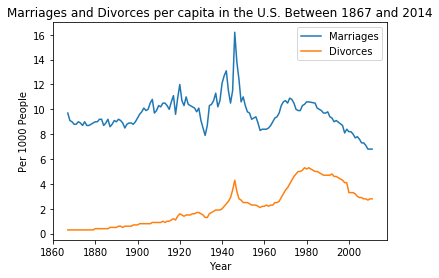

In [158]:
import seaborn as sns
ax = sns.lineplot(x="Year", y='Marriages_per_1000', data=marriage, label='Marriages')
ax = sns.lineplot(x="Year", y='Divorces_per_1000', data=marriage, label='Divorces')
ax.set(ylabel='Per 1000 People')
ax.set_title('Marriages and Divorces per capita in the U.S. Between 1867 and 2014')
ax

### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Don't forget to label your axes!

Text(0, 0.5, 'Per 1000 People')

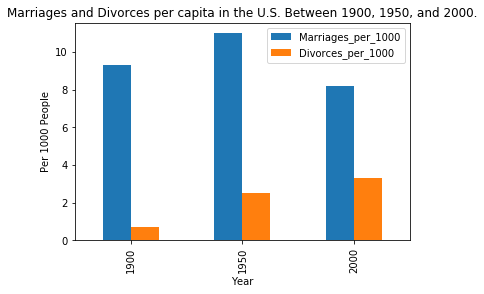

In [157]:
import matplotlib.pyplot as plt

#0-1867: 1900-1867=33; 1950-1867=83; 2000-1867=133;
table=marriage.iloc[[33,83,133]]
table=table.groupby('Year')[['Marriages_per_1000', 'Divorces_per_1000']].sum()
table.plot(kind='bar')
plt.title('Marriages and Divorces per capita in the U.S. Between 1900, 1950, and 2000.')
plt.ylabel('Per 1000 People')

### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. 

Sort the actors by their kill count and label each bar with the corresponding actor's name. 

Don't forget to label your axes!

Text(0.5, 0, 'Killing number')

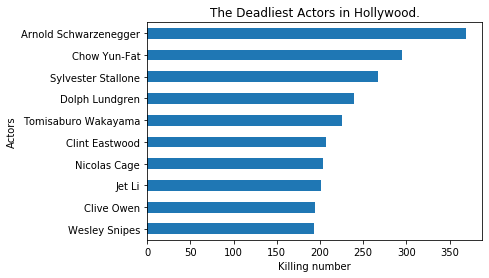

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

kills = pd.read_csv('actor_kill_counts.csv')
killtable = kills.set_index('Actor')
killtable['Count'].sort_values(ascending=True).plot.barh()
plt.title('The Deadliest Actors in Hollywood.')
plt.ylabel('Actors')
plt.xlabel('Killing number')

### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B9B8C73C8>],
      dtype=object)

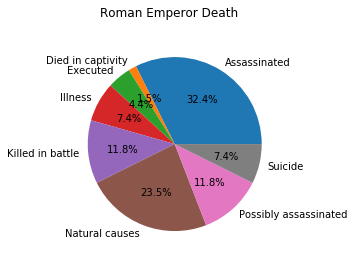

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

emperor = pd.read_csv('roman-emperor-reigns.csv')
emperortable = emperor.set_index('Emperor')
deathtable = emperortable.groupby('Cause_of_Death').count()/len(emperortable)
deathtable = deathtable.rename(columns={'Length_of_Reign':''})
deathtable.plot(kind='pie', autopct='%1.1f%%', title='Roman Emperor Death', subplots=True, legend=False)

### Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes! Color each dot according to its year.

Text(0.5, 1.0, 'Total Arcade Revenue and Computer Science Doctorates Awarded (US) between 2000 and 2009.\n')

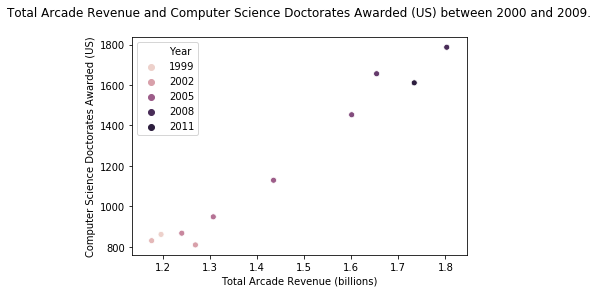

In [302]:
import pandas as pd
import seaborn as sns

doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', data=doctorates).set_title('Total Arcade Revenue and Computer Science Doctorates Awarded (US) between 2000 and 2009.\n')